In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_text

## Data / Goal
The goal is to predict which customers will buy a SUV, so a business can target social media adverts accordingly. The dataset has 400 observations. The independent variables are age and salary. The dependent variable is binary, with 1 = bought SUV, and 0 = did not buy SUV.

In [10]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although individuals under the age of 30 tend not to earn very high salaries. It also appears people under the age of 30 tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

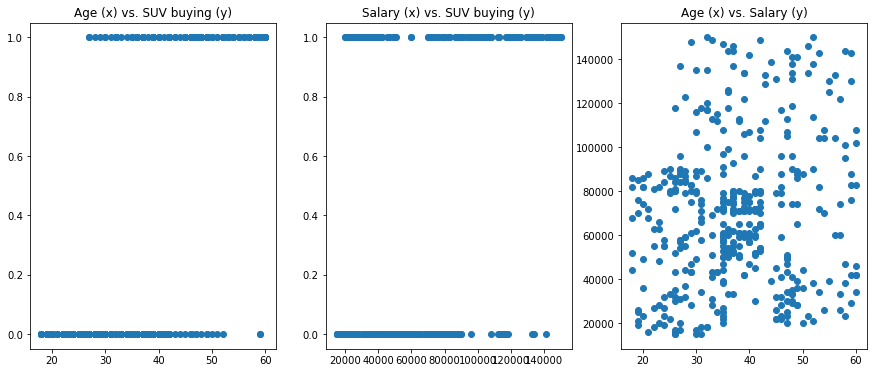

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## DecisionTreeClassifier
**Preprocessing**: The dataset is split 75% training, and 25% test. There is no need to standardize or normalize the data because a decision tree is unaffected by the sizes of different features. There are no outliers, but if they were there would be limited advantage in removing them.

**Approach**: A decision tree recursively divides up the feature space. The algorithm chooses to split a feature at a certain threshold by calculating an 'impurity score' for every possible split for each feature. The split is chosen that creates the most 'information gain' (i.e. does the best job at splitting the classes). In this case we set a maximum depth of 5 which indicates a maximum of 5 splits (this is a hyperparameter to be tuned).

**Advantages/Disadvantages**: Decision trees are good at learning non-linear relationships, are relatively inexpensive to compute and easy to understand. It tends to be pretty accurate, and works well with simple datasets. Depending on the hyperparameters it is easy to overfit a decision tree so pruning techniques might be needed. Another drawback, is decision trees don't work well in high dimension / sparse spaces, which makes it difficult to divide up the feature space. Furthermore, as shown graphically below, the decision boundary is restricted to being parallel to attribute axes.

**Results**: Accuracy of 94% was achieved. As mentioned above, decision trees are easy to understand and each split can be shown below. It was interesting to see the first split (most informative) was 'age' = 44.5. As initially observed, older people appear more likely to buy SUV's. The decision tree boundary is shown graphically below (notice the boundary line is parallel to the axis).

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state =0)
pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy', max_depth=5))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)

[[65  3]
 [ 3 29]]


0.94

In [14]:
tree_rules = export_text(model.steps[0][1], feature_names=['Age','Salary'])
print(tree_rules)

|--- Age <= 44.50
|   |--- Salary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- Salary <= 67500.00
|   |   |   |   |--- class: 0
|   |   |   |--- Salary >  67500.00
|   |   |   |   |--- Salary <= 83500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  83500.00
|   |   |   |   |   |--- class: 1
|   |--- Salary >  90500.00
|   |   |--- Salary <= 133500.00
|   |   |   |--- Salary <= 107500.00
|   |   |   |   |--- class: 1
|   |   |   |--- Salary >  107500.00
|   |   |   |   |--- Salary <= 116500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  116500.00
|   |   |   |   |   |--- class: 1
|   |   |--- Salary >  133500.00
|   |   |   |--- class: 1
|--- Age >  44.50
|   |--- Salary <= 41500.00
|   |   |--- Salary <= 22500.00
|   |   |   |--- Salary <= 21500.00
|   |   |   |   |--- class: 1
|   |   |   |--- Salary >  21500.00
|   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |--- class: 1
|   

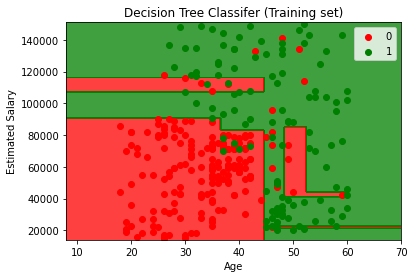

In [15]:
from matplotlib.colors import ListedColormap
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifer (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

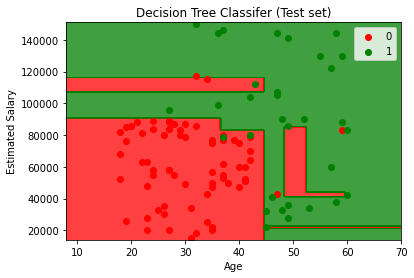

In [16]:
from matplotlib.colors import ListedColormap
X_set = X_test
y_set = y_test
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifer (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()